In [1]:
pip install prophet

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\suman\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



                                              0.0/12.9 MB ? eta -:--:--
                                              0.1/12.9 MB 3.2 MB/s eta 0:00:05
                                              0.2/12.9 MB 2.9 MB/s eta 0:00:05
                                              0.3/12.9 MB 2.8 MB/s eta 0:00:05
     -                                        0.5/12.9 MB 3.4 MB/s eta 0:00:04
     --                                       0.7/12.9 MB 3.2 MB/s eta 0:00:04
     --                                       0.8/12.9 MB 3.4 MB/s eta 0:00:04
     ---                                      1.0/12.9 MB 3.3 MB/s eta 0:00:04
     ---                                      1.1/12.9 MB 3.3 MB/s eta 0:00:04
     ----                                     1.4/12.9 MB 3.4 MB/s eta 0:00:04
     ----                                     1.5/12.9 MB 3.5 MB/s eta 0:00:04
     -----                                    1.7/12.9 MB 3.6 MB/s eta 0:00:04
     ------                                   2.0/12.9 MB 

In [10]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_excel('data v2.xlsx')

In [12]:
df = data.iloc[:, 1:]

df.head()

,wk 1,wk 2,wk 3,wk 4,wk 5,wk 6,wk 7,wk 8,wk 9,wk 10,...,wk 53,wk 54,wk 55,wk 56,wk 57,wk 58,wk 59,wk 60,wk 61,wk 62
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,2914.0,7470.0,NaN,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0


In [13]:
def has_nulls(dataset):
    print("Dataset has nulls is ", dataset.isnull().values.any())

has_nulls(df)

Dataset has nulls is  True


In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df))

has_nulls(df)

Dataset has nulls is  False


In [15]:
import pandas as pd
from prophet import Prophet
from sklearn.cluster import KMeans

def calculate_trend(sales_data):
    # Create a DataFrame with date and sales columns
    df = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=len(sales_data), freq='W'), 'y': sales_data})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Create a DataFrame for future predictions (next 52 weeks)
    future = model.make_future_dataframe(periods=52, freq='W')

    # Make predictions for the future
    forecast = model.predict(future)

    # Extract the trend from the forecast
    trend = forecast['yhat'].iloc[-52:].mean() - forecast['yhat'].iloc[-104:-52].mean()

    return trend

# Example data for 100 products with 52 weeks of sales each
# Replace this with your actual sales data DataFrame
sales_data = df  # 100 products x 52 weeks DataFrame

# Perform KMeans clustering to group the products
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
sales_data['cluster'] = kmeans.fit_predict(sales_data)

# Calculate the trend for each cluster
trends_per_cluster = {}
for cluster in range(num_clusters):
    cluster_sales_data = sales_data[sales_data['cluster'] == cluster].drop('cluster', axis=1)
    cluster_sales_avg = cluster_sales_data.mean(axis=0)
    cluster_trend = calculate_trend(cluster_sales_avg.tolist())
    trends_per_cluster[cluster] = cluster_trend

# Print the trends for each cluster
for cluster, trend in trends_per_cluster.items():
    print(f"Trend for Cluster {cluster}: {trend}")

15:56:34 - cmdstanpy - INFO - Chain [1] start processing
15:56:35 - cmdstanpy - INFO - Chain [1] done processing
15:56:35 - cmdstanpy - INFO - Chain [1] start processing
15:56:35 - cmdstanpy - INFO - Chain [1] done processing
15:56:35 - cmdstanpy - INFO - Chain [1] start processing
15:56:35 - cmdstanpy - INFO - Chain [1] done processing
15:56:36 - cmdstanpy - INFO - Chain [1] start processing
15:56:36 - cmdstanpy - INFO - Chain [1] done processing
15:56:36 - cmdstanpy - INFO - Chain [1] start processing
15:56:36 - cmdstanpy - INFO - Chain [1] done processing


Trend for Cluster 0: 114907.97793853714
Trend for Cluster 1: 4354.805674352752
Trend for Cluster 2: 4943551.72180132
Trend for Cluster 3: 1223813.482841882
Trend for Cluster 4: 1558281.558755124


In [ ]:
    import pandas as pd
    from prophet import Prophet
    from sklearn.cluster import KMeans

    def determine_trend_category(trend_value):
        if trend_value > 5:
            return "Emerging"
        elif trend_value < -5:
            return "Declining"
        else:
            return "Saturated"

    def calculate_trend(sales_data):
        # Create a DataFrame with date and sales columns
        df = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=len(sales_data), freq='W'), 'y': sales_data})

        # Initialize and fit the Prophet model
        model = Prophet()
        model.fit(df)

        # Create a DataFrame for future predictions (next 52 weeks)
        future = model.make_future_dataframe(periods=52, freq='W')

        # Make predictions for the future
        forecast = model.predict(future)

        # Extract the trend from the forecast
        trend = forecast['yhat'].iloc[-52:].mean() - forecast['yhat'].iloc[-104:-52].mean()

        return trend

    # Example data for 100 products with 52 weeks of sales each
    # Replace this with your actual sales data DataFrame
    sales_data = df # 100 products x 52 weeks DataFrame

    scaler = MinMaxScaler()
    normalized_sales_data = scaler.fit_transform(sales_data.T).T

    # Perform KMeans clustering to group the products
    num_clusters = 5  # You can adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=num_clusters)
    sales_data['cluster'] = kmeans.fit_predict(sales_data)

    # Calculate the trend for each cluster and determine the trend category
    trends_per_cluster = {}
    for cluster in range(num_clusters):
        cluster_sales_data = sales_data[sales_data['cluster'] == cluster].drop('cluster', axis=1)
        cluster_sales_avg = cluster_sales_data.mean(axis=0)
        cluster_trend = calculate_trend(cluster_sales_avg.tolist())
        print(cluster_trend)
        #trend_category = determine_trend_category(cluster_trend)
        #trends_per_cluster[cluster] = trend_category

    # Print the trends for each cluster
    #for cluster, trend_category in trends_per_cluster.items():
        #print(f"Trend for Cluster {cluster}: {trend_category}")


In [18]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

def determine_trend_category(trend_value):
    if trend_value > 5:
        return "Emerging"
    elif trend_value < -5:
        return "Declining"
    else:
        return "Saturated"

def calculate_trend(sales_data):
    # Create a DataFrame with date and sales columns
    df = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=len(sales_data), freq='W'), 'y': sales_data})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Create a DataFrame for future predictions (next 52 weeks)
    future = model.make_future_dataframe(periods=52, freq='W')

    # Make predictions for the future
    forecast = model.predict(future)

    # Extract the trend from the forecast
    trend = forecast['yhat'].iloc[-52:].mean() - forecast['yhat'].iloc[-104:-52].mean()

    return trend

# Example data for 100 products with 52 weeks of sales each
# Replace this with your actual sales data DataFrame
sales_data = df  # 100 products x 52 weeks DataFrame

# Remove outliers before clustering using RobustScaler
scaler = RobustScaler()
normalized_sales_data = scaler.fit_transform(sales_data.T).T

# Perform KMeans clustering to group the products
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
sales_data['cluster'] = kmeans.fit_predict(normalized_sales_data)

# Calculate the trend for each product in each cluster and determine the trend category
trends_per_cluster = {}
for cluster in range(num_clusters):
    cluster_products = sales_data[sales_data['cluster'] == cluster].drop('cluster', axis=1)
    trends_per_product = []
    for _, product_data in cluster_products.iterrows():
        trend = calculate_trend(product_data.values)
        trends_per_product.append(trend)
    cluster_trend = np.mean(trends_per_product)
    trend_category = determine_trend_category(cluster_trend)
    trends_per_cluster[cluster] = trend_category

# Print the trends for each cluster
for cluster, trend_category in trends_per_cluster.items():
    print(f"Trend for Cluster {cluster}: {trend_category}")


15:59:00 - cmdstanpy - INFO - Chain [1] start processing
15:59:01 - cmdstanpy - INFO - Chain [1] done processing
15:59:01 - cmdstanpy - INFO - Chain [1] start processing
15:59:01 - cmdstanpy - INFO - Chain [1] done processing
15:59:01 - cmdstanpy - INFO - Chain [1] start processing
15:59:01 - cmdstanpy - INFO - Chain [1] done processing
15:59:02 - cmdstanpy - INFO - Chain [1] start processing
15:59:02 - cmdstanpy - INFO - Chain [1] done processing
15:59:02 - cmdstanpy - INFO - Chain [1] start processing
15:59:02 - cmdstanpy - INFO - Chain [1] done processing
15:59:02 - cmdstanpy - INFO - Chain [1] start processing
15:59:02 - cmdstanpy - INFO - Chain [1] done processing
15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:03 - cmdstanpy - INFO - Chain [1] done processing
15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:03 - cmdstanpy - INFO - Chain [1] done processing
15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:03 - cmdstanpy - INFO - Chain [1]

15:59:23 - cmdstanpy - INFO - Chain [1] done processing
15:59:23 - cmdstanpy - INFO - Chain [1] start processing
15:59:23 - cmdstanpy - INFO - Chain [1] done processing
15:59:24 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1] done processing
15:59:24 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1] done processing
15:59:24 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1] done processing
15:59:24 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1] done processing
15:59:25 - cmdstanpy - INFO - Chain [1] start processing
15:59:25 - cmdstanpy - INFO - Chain [1] done processing
15:59:25 - cmdstanpy - INFO - Chain [1] start processing
15:59:25 - cmdstanpy - INFO - Chain [1] done processing
15:59:25 - cmdstanpy - INFO - Chain [1] start processing
15:59:25 - cmdstanpy - INFO - Chain [1] done processing
15:59:25 - cmdstanpy - INFO - Chain [1] 

15:59:41 - cmdstanpy - INFO - Chain [1] done processing
15:59:41 - cmdstanpy - INFO - Chain [1] start processing
15:59:41 - cmdstanpy - INFO - Chain [1] done processing
15:59:41 - cmdstanpy - INFO - Chain [1] start processing
15:59:41 - cmdstanpy - INFO - Chain [1] done processing
15:59:42 - cmdstanpy - INFO - Chain [1] start processing
15:59:42 - cmdstanpy - INFO - Chain [1] done processing
15:59:42 - cmdstanpy - INFO - Chain [1] start processing
15:59:42 - cmdstanpy - INFO - Chain [1] done processing
15:59:42 - cmdstanpy - INFO - Chain [1] start processing
15:59:42 - cmdstanpy - INFO - Chain [1] done processing
15:59:42 - cmdstanpy - INFO - Chain [1] start processing
15:59:42 - cmdstanpy - INFO - Chain [1] done processing
15:59:43 - cmdstanpy - INFO - Chain [1] start processing
15:59:43 - cmdstanpy - INFO - Chain [1] done processing
15:59:43 - cmdstanpy - INFO - Chain [1] start processing
15:59:43 - cmdstanpy - INFO - Chain [1] done processing
15:59:43 - cmdstanpy - INFO - Chain [1] 

15:59:59 - cmdstanpy - INFO - Chain [1] done processing
16:00:00 - cmdstanpy - INFO - Chain [1] start processing
16:00:00 - cmdstanpy - INFO - Chain [1] done processing
16:00:00 - cmdstanpy - INFO - Chain [1] start processing
16:00:00 - cmdstanpy - INFO - Chain [1] done processing
16:00:00 - cmdstanpy - INFO - Chain [1] start processing
16:00:00 - cmdstanpy - INFO - Chain [1] done processing
16:00:00 - cmdstanpy - INFO - Chain [1] start processing
16:00:00 - cmdstanpy - INFO - Chain [1] done processing
16:00:00 - cmdstanpy - INFO - Chain [1] start processing
16:00:01 - cmdstanpy - INFO - Chain [1] done processing
16:00:01 - cmdstanpy - INFO - Chain [1] start processing
16:00:01 - cmdstanpy - INFO - Chain [1] done processing
16:00:01 - cmdstanpy - INFO - Chain [1] start processing
16:00:01 - cmdstanpy - INFO - Chain [1] done processing
16:00:01 - cmdstanpy - INFO - Chain [1] start processing
16:00:01 - cmdstanpy - INFO - Chain [1] done processing
16:00:01 - cmdstanpy - INFO - Chain [1] 

16:00:18 - cmdstanpy - INFO - Chain [1] done processing
16:00:18 - cmdstanpy - INFO - Chain [1] start processing
16:00:18 - cmdstanpy - INFO - Chain [1] done processing
16:00:18 - cmdstanpy - INFO - Chain [1] start processing
16:00:18 - cmdstanpy - INFO - Chain [1] done processing
16:00:18 - cmdstanpy - INFO - Chain [1] start processing
16:00:19 - cmdstanpy - INFO - Chain [1] done processing
16:00:19 - cmdstanpy - INFO - Chain [1] start processing
16:00:19 - cmdstanpy - INFO - Chain [1] done processing
16:00:19 - cmdstanpy - INFO - Chain [1] start processing
16:00:19 - cmdstanpy - INFO - Chain [1] done processing
16:00:19 - cmdstanpy - INFO - Chain [1] start processing
16:00:19 - cmdstanpy - INFO - Chain [1] done processing
16:00:19 - cmdstanpy - INFO - Chain [1] start processing
16:00:19 - cmdstanpy - INFO - Chain [1] done processing
16:00:20 - cmdstanpy - INFO - Chain [1] start processing
16:00:20 - cmdstanpy - INFO - Chain [1] done processing
16:00:20 - cmdstanpy - INFO - Chain [1] 

16:00:36 - cmdstanpy - INFO - Chain [1] done processing
16:00:36 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1] done processing
16:00:36 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1] done processing
16:00:37 - cmdstanpy - INFO - Chain [1] start processing
16:00:37 - cmdstanpy - INFO - Chain [1] done processing
16:00:37 - cmdstanpy - INFO - Chain [1] start processing
16:00:37 - cmdstanpy - INFO - Chain [1] done processing
16:00:37 - cmdstanpy - INFO - Chain [1] start processing
16:00:37 - cmdstanpy - INFO - Chain [1] done processing
16:00:37 - cmdstanpy - INFO - Chain [1] start processing
16:00:37 - cmdstanpy - INFO - Chain [1] done processing
16:00:38 - cmdstanpy - INFO - Chain [1] start processing
16:00:38 - cmdstanpy - INFO - Chain [1] done processing
16:00:38 - cmdstanpy - INFO - Chain [1] start processing
16:00:38 - cmdstanpy - INFO - Chain [1] done processing
16:00:38 - cmdstanpy - INFO - Chain [1] 

16:00:55 - cmdstanpy - INFO - Chain [1] done processing
16:00:55 - cmdstanpy - INFO - Chain [1] start processing
16:00:55 - cmdstanpy - INFO - Chain [1] done processing
16:00:55 - cmdstanpy - INFO - Chain [1] start processing
16:00:55 - cmdstanpy - INFO - Chain [1] done processing
16:00:55 - cmdstanpy - INFO - Chain [1] start processing
16:00:55 - cmdstanpy - INFO - Chain [1] done processing
16:00:55 - cmdstanpy - INFO - Chain [1] start processing
16:00:56 - cmdstanpy - INFO - Chain [1] done processing
16:00:56 - cmdstanpy - INFO - Chain [1] start processing
16:00:56 - cmdstanpy - INFO - Chain [1] done processing
16:00:56 - cmdstanpy - INFO - Chain [1] start processing
16:00:56 - cmdstanpy - INFO - Chain [1] done processing
16:00:56 - cmdstanpy - INFO - Chain [1] start processing
16:00:56 - cmdstanpy - INFO - Chain [1] done processing
16:00:56 - cmdstanpy - INFO - Chain [1] start processing
16:00:57 - cmdstanpy - INFO - Chain [1] done processing
16:00:57 - cmdstanpy - INFO - Chain [1] 

16:01:12 - cmdstanpy - INFO - Chain [1] done processing
16:01:12 - cmdstanpy - INFO - Chain [1] start processing
16:01:13 - cmdstanpy - INFO - Chain [1] done processing
16:01:13 - cmdstanpy - INFO - Chain [1] start processing
16:01:13 - cmdstanpy - INFO - Chain [1] done processing
16:01:13 - cmdstanpy - INFO - Chain [1] start processing
16:01:13 - cmdstanpy - INFO - Chain [1] done processing
16:01:13 - cmdstanpy - INFO - Chain [1] start processing
16:01:13 - cmdstanpy - INFO - Chain [1] done processing
16:01:13 - cmdstanpy - INFO - Chain [1] start processing
16:01:14 - cmdstanpy - INFO - Chain [1] done processing
16:01:14 - cmdstanpy - INFO - Chain [1] start processing
16:01:14 - cmdstanpy - INFO - Chain [1] done processing
16:01:14 - cmdstanpy - INFO - Chain [1] start processing
16:01:14 - cmdstanpy - INFO - Chain [1] done processing
16:01:14 - cmdstanpy - INFO - Chain [1] start processing
16:01:14 - cmdstanpy - INFO - Chain [1] done processing
16:01:15 - cmdstanpy - INFO - Chain [1] 

16:01:30 - cmdstanpy - INFO - Chain [1] done processing
16:01:30 - cmdstanpy - INFO - Chain [1] start processing
16:01:31 - cmdstanpy - INFO - Chain [1] done processing
16:01:31 - cmdstanpy - INFO - Chain [1] start processing
16:01:31 - cmdstanpy - INFO - Chain [1] done processing
16:01:31 - cmdstanpy - INFO - Chain [1] start processing
16:01:31 - cmdstanpy - INFO - Chain [1] done processing
16:01:31 - cmdstanpy - INFO - Chain [1] start processing
16:01:31 - cmdstanpy - INFO - Chain [1] done processing
16:01:31 - cmdstanpy - INFO - Chain [1] start processing
16:01:31 - cmdstanpy - INFO - Chain [1] done processing
16:01:32 - cmdstanpy - INFO - Chain [1] start processing
16:01:32 - cmdstanpy - INFO - Chain [1] done processing
16:01:32 - cmdstanpy - INFO - Chain [1] start processing
16:01:32 - cmdstanpy - INFO - Chain [1] done processing
16:01:32 - cmdstanpy - INFO - Chain [1] start processing
16:01:32 - cmdstanpy - INFO - Chain [1] done processing
16:01:32 - cmdstanpy - INFO - Chain [1] 

16:01:48 - cmdstanpy - INFO - Chain [1] done processing
16:01:48 - cmdstanpy - INFO - Chain [1] start processing
16:01:49 - cmdstanpy - INFO - Chain [1] done processing
16:01:49 - cmdstanpy - INFO - Chain [1] start processing
16:01:49 - cmdstanpy - INFO - Chain [1] done processing
16:01:49 - cmdstanpy - INFO - Chain [1] start processing
16:01:49 - cmdstanpy - INFO - Chain [1] done processing
16:01:49 - cmdstanpy - INFO - Chain [1] start processing
16:01:49 - cmdstanpy - INFO - Chain [1] done processing
16:01:49 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] 

16:02:06 - cmdstanpy - INFO - Chain [1] done processing
16:02:06 - cmdstanpy - INFO - Chain [1] start processing
16:02:07 - cmdstanpy - INFO - Chain [1] done processing
16:02:07 - cmdstanpy - INFO - Chain [1] start processing
16:02:07 - cmdstanpy - INFO - Chain [1] done processing
16:02:07 - cmdstanpy - INFO - Chain [1] start processing
16:02:07 - cmdstanpy - INFO - Chain [1] done processing
16:02:07 - cmdstanpy - INFO - Chain [1] start processing
16:02:07 - cmdstanpy - INFO - Chain [1] done processing
16:02:07 - cmdstanpy - INFO - Chain [1] start processing
16:02:07 - cmdstanpy - INFO - Chain [1] done processing
16:02:08 - cmdstanpy - INFO - Chain [1] start processing
16:02:08 - cmdstanpy - INFO - Chain [1] done processing
16:02:08 - cmdstanpy - INFO - Chain [1] start processing
16:02:08 - cmdstanpy - INFO - Chain [1] done processing
16:02:08 - cmdstanpy - INFO - Chain [1] start processing
16:02:08 - cmdstanpy - INFO - Chain [1] done processing
16:02:08 - cmdstanpy - INFO - Chain [1] 

16:02:24 - cmdstanpy - INFO - Chain [1] done processing
16:02:24 - cmdstanpy - INFO - Chain [1] start processing
16:02:24 - cmdstanpy - INFO - Chain [1] done processing
16:02:24 - cmdstanpy - INFO - Chain [1] start processing
16:02:25 - cmdstanpy - INFO - Chain [1] done processing
16:02:25 - cmdstanpy - INFO - Chain [1] start processing
16:02:25 - cmdstanpy - INFO - Chain [1] done processing
16:02:25 - cmdstanpy - INFO - Chain [1] start processing
16:02:25 - cmdstanpy - INFO - Chain [1] done processing
16:02:25 - cmdstanpy - INFO - Chain [1] start processing
16:02:25 - cmdstanpy - INFO - Chain [1] done processing
16:02:26 - cmdstanpy - INFO - Chain [1] start processing
16:02:26 - cmdstanpy - INFO - Chain [1] done processing
16:02:26 - cmdstanpy - INFO - Chain [1] start processing
16:02:26 - cmdstanpy - INFO - Chain [1] done processing
16:02:26 - cmdstanpy - INFO - Chain [1] start processing
16:02:26 - cmdstanpy - INFO - Chain [1] done processing
16:02:26 - cmdstanpy - INFO - Chain [1] 

16:02:43 - cmdstanpy - INFO - Chain [1] done processing
16:02:43 - cmdstanpy - INFO - Chain [1] start processing
16:02:43 - cmdstanpy - INFO - Chain [1] done processing
16:02:43 - cmdstanpy - INFO - Chain [1] start processing
16:02:43 - cmdstanpy - INFO - Chain [1] done processing
16:02:43 - cmdstanpy - INFO - Chain [1] start processing
16:02:43 - cmdstanpy - INFO - Chain [1] done processing
16:02:43 - cmdstanpy - INFO - Chain [1] start processing
16:02:43 - cmdstanpy - INFO - Chain [1] done processing
16:02:44 - cmdstanpy - INFO - Chain [1] start processing
16:02:44 - cmdstanpy - INFO - Chain [1] done processing
16:02:44 - cmdstanpy - INFO - Chain [1] start processing
16:02:44 - cmdstanpy - INFO - Chain [1] done processing
16:02:44 - cmdstanpy - INFO - Chain [1] start processing
16:02:44 - cmdstanpy - INFO - Chain [1] done processing
16:02:44 - cmdstanpy - INFO - Chain [1] start processing
16:02:45 - cmdstanpy - INFO - Chain [1] done processing
16:02:45 - cmdstanpy - INFO - Chain [1] 

16:03:01 - cmdstanpy - INFO - Chain [1] done processing
16:03:01 - cmdstanpy - INFO - Chain [1] start processing
16:03:01 - cmdstanpy - INFO - Chain [1] done processing
16:03:01 - cmdstanpy - INFO - Chain [1] start processing
16:03:01 - cmdstanpy - INFO - Chain [1] done processing
16:03:01 - cmdstanpy - INFO - Chain [1] start processing
16:03:02 - cmdstanpy - INFO - Chain [1] done processing
16:03:02 - cmdstanpy - INFO - Chain [1] start processing
16:03:02 - cmdstanpy - INFO - Chain [1] done processing
16:03:02 - cmdstanpy - INFO - Chain [1] start processing
16:03:02 - cmdstanpy - INFO - Chain [1] done processing
16:03:02 - cmdstanpy - INFO - Chain [1] start processing
16:03:02 - cmdstanpy - INFO - Chain [1] done processing
16:03:02 - cmdstanpy - INFO - Chain [1] start processing
16:03:03 - cmdstanpy - INFO - Chain [1] done processing
16:03:03 - cmdstanpy - INFO - Chain [1] start processing
16:03:03 - cmdstanpy - INFO - Chain [1] done processing
16:03:03 - cmdstanpy - INFO - Chain [1] 

16:03:19 - cmdstanpy - INFO - Chain [1] done processing
16:03:19 - cmdstanpy - INFO - Chain [1] start processing
16:03:19 - cmdstanpy - INFO - Chain [1] done processing
16:03:19 - cmdstanpy - INFO - Chain [1] start processing
16:03:20 - cmdstanpy - INFO - Chain [1] done processing
16:03:20 - cmdstanpy - INFO - Chain [1] start processing
16:03:20 - cmdstanpy - INFO - Chain [1] done processing
16:03:20 - cmdstanpy - INFO - Chain [1] start processing
16:03:20 - cmdstanpy - INFO - Chain [1] done processing
16:03:20 - cmdstanpy - INFO - Chain [1] start processing
16:03:20 - cmdstanpy - INFO - Chain [1] done processing
16:03:20 - cmdstanpy - INFO - Chain [1] start processing
16:03:21 - cmdstanpy - INFO - Chain [1] done processing
16:03:21 - cmdstanpy - INFO - Chain [1] start processing
16:03:21 - cmdstanpy - INFO - Chain [1] done processing
16:03:21 - cmdstanpy - INFO - Chain [1] start processing
16:03:21 - cmdstanpy - INFO - Chain [1] done processing
16:03:21 - cmdstanpy - INFO - Chain [1] 

16:03:38 - cmdstanpy - INFO - Chain [1] done processing
16:03:38 - cmdstanpy - INFO - Chain [1] start processing
16:03:38 - cmdstanpy - INFO - Chain [1] done processing
16:03:38 - cmdstanpy - INFO - Chain [1] start processing
16:03:38 - cmdstanpy - INFO - Chain [1] done processing
16:03:38 - cmdstanpy - INFO - Chain [1] start processing
16:03:39 - cmdstanpy - INFO - Chain [1] done processing
16:03:39 - cmdstanpy - INFO - Chain [1] start processing
16:03:39 - cmdstanpy - INFO - Chain [1] done processing
16:03:39 - cmdstanpy - INFO - Chain [1] start processing
16:03:39 - cmdstanpy - INFO - Chain [1] done processing
16:03:39 - cmdstanpy - INFO - Chain [1] start processing
16:03:39 - cmdstanpy - INFO - Chain [1] done processing
16:03:39 - cmdstanpy - INFO - Chain [1] start processing
16:03:40 - cmdstanpy - INFO - Chain [1] done processing
16:03:40 - cmdstanpy - INFO - Chain [1] start processing
16:03:40 - cmdstanpy - INFO - Chain [1] done processing
16:03:40 - cmdstanpy - INFO - Chain [1] 

16:03:56 - cmdstanpy - INFO - Chain [1] done processing
16:03:56 - cmdstanpy - INFO - Chain [1] start processing
16:03:56 - cmdstanpy - INFO - Chain [1] done processing
16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing
16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing
16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing
16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing
16:03:58 - cmdstanpy - INFO - Chain [1] start processing
16:03:58 - cmdstanpy - INFO - Chain [1] done processing
16:03:58 - cmdstanpy - INFO - Chain [1] start processing
16:03:58 - cmdstanpy - INFO - Chain [1] done processing
16:03:58 - cmdstanpy - INFO - Chain [1] start processing
16:03:58 - cmdstanpy - INFO - Chain [1] done processing
16:03:58 - cmdstanpy - INFO - Chain [1] 

16:04:14 - cmdstanpy - INFO - Chain [1] done processing
16:04:14 - cmdstanpy - INFO - Chain [1] start processing
16:04:14 - cmdstanpy - INFO - Chain [1] done processing
16:04:15 - cmdstanpy - INFO - Chain [1] start processing
16:04:15 - cmdstanpy - INFO - Chain [1] done processing
16:04:15 - cmdstanpy - INFO - Chain [1] start processing
16:04:15 - cmdstanpy - INFO - Chain [1] done processing
16:04:15 - cmdstanpy - INFO - Chain [1] start processing
16:04:15 - cmdstanpy - INFO - Chain [1] done processing
16:04:15 - cmdstanpy - INFO - Chain [1] start processing
16:04:15 - cmdstanpy - INFO - Chain [1] done processing
16:04:16 - cmdstanpy - INFO - Chain [1] start processing
16:04:16 - cmdstanpy - INFO - Chain [1] done processing
16:04:16 - cmdstanpy - INFO - Chain [1] start processing
16:04:16 - cmdstanpy - INFO - Chain [1] done processing
16:04:16 - cmdstanpy - INFO - Chain [1] start processing
16:04:16 - cmdstanpy - INFO - Chain [1] done processing
16:04:16 - cmdstanpy - INFO - Chain [1] 

16:04:32 - cmdstanpy - INFO - Chain [1] done processing
16:04:33 - cmdstanpy - INFO - Chain [1] start processing
16:04:33 - cmdstanpy - INFO - Chain [1] done processing
16:04:33 - cmdstanpy - INFO - Chain [1] start processing
16:04:33 - cmdstanpy - INFO - Chain [1] done processing
16:04:33 - cmdstanpy - INFO - Chain [1] start processing
16:04:33 - cmdstanpy - INFO - Chain [1] done processing
16:04:33 - cmdstanpy - INFO - Chain [1] start processing
16:04:33 - cmdstanpy - INFO - Chain [1] done processing
16:04:34 - cmdstanpy - INFO - Chain [1] start processing
16:04:34 - cmdstanpy - INFO - Chain [1] done processing
16:04:34 - cmdstanpy - INFO - Chain [1] start processing
16:04:34 - cmdstanpy - INFO - Chain [1] done processing
16:04:34 - cmdstanpy - INFO - Chain [1] start processing
16:04:34 - cmdstanpy - INFO - Chain [1] done processing
16:04:34 - cmdstanpy - INFO - Chain [1] start processing
16:04:34 - cmdstanpy - INFO - Chain [1] done processing
16:04:35 - cmdstanpy - INFO - Chain [1] 

16:04:51 - cmdstanpy - INFO - Chain [1] done processing
16:04:51 - cmdstanpy - INFO - Chain [1] start processing
16:04:51 - cmdstanpy - INFO - Chain [1] done processing
16:04:51 - cmdstanpy - INFO - Chain [1] start processing
16:04:51 - cmdstanpy - INFO - Chain [1] done processing
16:04:51 - cmdstanpy - INFO - Chain [1] start processing
16:04:51 - cmdstanpy - INFO - Chain [1] done processing
16:04:51 - cmdstanpy - INFO - Chain [1] start processing
16:04:51 - cmdstanpy - INFO - Chain [1] done processing
16:04:52 - cmdstanpy - INFO - Chain [1] start processing
16:04:52 - cmdstanpy - INFO - Chain [1] done processing
16:04:52 - cmdstanpy - INFO - Chain [1] start processing
16:04:52 - cmdstanpy - INFO - Chain [1] done processing
16:04:52 - cmdstanpy - INFO - Chain [1] start processing
16:04:52 - cmdstanpy - INFO - Chain [1] done processing
16:04:52 - cmdstanpy - INFO - Chain [1] start processing
16:04:52 - cmdstanpy - INFO - Chain [1] done processing
16:04:52 - cmdstanpy - INFO - Chain [1] 

16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:11 - cmdstanpy - INFO - Chain [1] start processing
16:05:11 - cmdstanpy - INFO - Chain [1] done processing
16:05:11 - cmdstanpy - INFO - Chain [1] start processing
16:05:11 - cmdstanpy - INFO - Chain [1] done processing
16:05:11 - cmdstanpy - INFO - Chain [1] start processing
16:05:11 - cmdstanpy - INFO - Chain [1] done processing
16:05:11 - cmdstanpy - INFO - Chain [1] start processing
16:05:12 - cmdstanpy - INFO - Chain [1] done processing
16:05:12 - cmdstanpy - INFO - Chain [1] start processing
16:05:12 - cmdstanpy - INFO - Chain [1] done processing
16:05:12 - cmdstanpy - INFO - Chain [1] start processing
16:05:12 - cmdstanpy - INFO - Chain [1] done processing
16:05:12 - cmdstanpy - INFO - Chain [1] 

16:05:29 - cmdstanpy - INFO - Chain [1] done processing
16:05:29 - cmdstanpy - INFO - Chain [1] start processing
16:05:29 - cmdstanpy - INFO - Chain [1] done processing
16:05:29 - cmdstanpy - INFO - Chain [1] start processing
16:05:29 - cmdstanpy - INFO - Chain [1] done processing
16:05:29 - cmdstanpy - INFO - Chain [1] start processing
16:05:29 - cmdstanpy - INFO - Chain [1] done processing
16:05:29 - cmdstanpy - INFO - Chain [1] start processing
16:05:30 - cmdstanpy - INFO - Chain [1] done processing
16:05:30 - cmdstanpy - INFO - Chain [1] start processing
16:05:30 - cmdstanpy - INFO - Chain [1] done processing
16:05:30 - cmdstanpy - INFO - Chain [1] start processing
16:05:30 - cmdstanpy - INFO - Chain [1] done processing
16:05:30 - cmdstanpy - INFO - Chain [1] start processing
16:05:30 - cmdstanpy - INFO - Chain [1] done processing
16:05:30 - cmdstanpy - INFO - Chain [1] start processing
16:05:31 - cmdstanpy - INFO - Chain [1] done processing
16:05:31 - cmdstanpy - INFO - Chain [1] 

16:05:47 - cmdstanpy - INFO - Chain [1] done processing
16:05:47 - cmdstanpy - INFO - Chain [1] start processing
16:05:47 - cmdstanpy - INFO - Chain [1] done processing
16:05:48 - cmdstanpy - INFO - Chain [1] start processing
16:05:48 - cmdstanpy - INFO - Chain [1] done processing
16:05:48 - cmdstanpy - INFO - Chain [1] start processing
16:05:48 - cmdstanpy - INFO - Chain [1] done processing
16:05:48 - cmdstanpy - INFO - Chain [1] start processing
16:05:48 - cmdstanpy - INFO - Chain [1] done processing
16:05:48 - cmdstanpy - INFO - Chain [1] start processing
16:05:48 - cmdstanpy - INFO - Chain [1] done processing
16:05:49 - cmdstanpy - INFO - Chain [1] start processing
16:05:49 - cmdstanpy - INFO - Chain [1] done processing
16:05:49 - cmdstanpy - INFO - Chain [1] start processing
16:05:49 - cmdstanpy - INFO - Chain [1] done processing
16:05:49 - cmdstanpy - INFO - Chain [1] start processing
16:05:49 - cmdstanpy - INFO - Chain [1] done processing
16:05:49 - cmdstanpy - INFO - Chain [1] 

16:06:05 - cmdstanpy - INFO - Chain [1] done processing
16:06:05 - cmdstanpy - INFO - Chain [1] start processing
16:06:05 - cmdstanpy - INFO - Chain [1] done processing
16:06:05 - cmdstanpy - INFO - Chain [1] start processing
16:06:05 - cmdstanpy - INFO - Chain [1] done processing
16:06:06 - cmdstanpy - INFO - Chain [1] start processing
16:06:06 - cmdstanpy - INFO - Chain [1] done processing
16:06:06 - cmdstanpy - INFO - Chain [1] start processing
16:06:06 - cmdstanpy - INFO - Chain [1] done processing
16:06:06 - cmdstanpy - INFO - Chain [1] start processing
16:06:06 - cmdstanpy - INFO - Chain [1] done processing
16:06:06 - cmdstanpy - INFO - Chain [1] start processing
16:06:07 - cmdstanpy - INFO - Chain [1] done processing
16:06:07 - cmdstanpy - INFO - Chain [1] start processing
16:06:07 - cmdstanpy - INFO - Chain [1] done processing
16:06:07 - cmdstanpy - INFO - Chain [1] start processing
16:06:07 - cmdstanpy - INFO - Chain [1] done processing
16:06:07 - cmdstanpy - INFO - Chain [1] 

16:06:23 - cmdstanpy - INFO - Chain [1] done processing
16:06:23 - cmdstanpy - INFO - Chain [1] start processing
16:06:23 - cmdstanpy - INFO - Chain [1] done processing
16:06:23 - cmdstanpy - INFO - Chain [1] start processing
16:06:24 - cmdstanpy - INFO - Chain [1] done processing
16:06:24 - cmdstanpy - INFO - Chain [1] start processing
16:06:24 - cmdstanpy - INFO - Chain [1] done processing
16:06:24 - cmdstanpy - INFO - Chain [1] start processing
16:06:24 - cmdstanpy - INFO - Chain [1] done processing
16:06:24 - cmdstanpy - INFO - Chain [1] start processing
16:06:24 - cmdstanpy - INFO - Chain [1] done processing
16:06:24 - cmdstanpy - INFO - Chain [1] start processing
16:06:25 - cmdstanpy - INFO - Chain [1] done processing
16:06:25 - cmdstanpy - INFO - Chain [1] start processing
16:06:25 - cmdstanpy - INFO - Chain [1] done processing
16:06:25 - cmdstanpy - INFO - Chain [1] start processing
16:06:25 - cmdstanpy - INFO - Chain [1] done processing
16:06:25 - cmdstanpy - INFO - Chain [1] 

16:06:42 - cmdstanpy - INFO - Chain [1] done processing
16:06:42 - cmdstanpy - INFO - Chain [1] start processing
16:06:42 - cmdstanpy - INFO - Chain [1] done processing
16:06:42 - cmdstanpy - INFO - Chain [1] start processing
16:06:42 - cmdstanpy - INFO - Chain [1] done processing
16:06:42 - cmdstanpy - INFO - Chain [1] start processing
16:06:43 - cmdstanpy - INFO - Chain [1] done processing
16:06:43 - cmdstanpy - INFO - Chain [1] start processing
16:06:43 - cmdstanpy - INFO - Chain [1] done processing
16:06:43 - cmdstanpy - INFO - Chain [1] start processing
16:06:43 - cmdstanpy - INFO - Chain [1] done processing
16:06:43 - cmdstanpy - INFO - Chain [1] start processing
16:06:43 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] 

16:07:00 - cmdstanpy - INFO - Chain [1] done processing
16:07:00 - cmdstanpy - INFO - Chain [1] start processing
16:07:00 - cmdstanpy - INFO - Chain [1] done processing
16:07:00 - cmdstanpy - INFO - Chain [1] start processing
16:07:00 - cmdstanpy - INFO - Chain [1] done processing
16:07:01 - cmdstanpy - INFO - Chain [1] start processing
16:07:01 - cmdstanpy - INFO - Chain [1] done processing
16:07:01 - cmdstanpy - INFO - Chain [1] start processing
16:07:01 - cmdstanpy - INFO - Chain [1] done processing
16:07:01 - cmdstanpy - INFO - Chain [1] start processing
16:07:01 - cmdstanpy - INFO - Chain [1] done processing
16:07:01 - cmdstanpy - INFO - Chain [1] start processing
16:07:02 - cmdstanpy - INFO - Chain [1] done processing
16:07:02 - cmdstanpy - INFO - Chain [1] start processing
16:07:02 - cmdstanpy - INFO - Chain [1] done processing
16:07:02 - cmdstanpy - INFO - Chain [1] start processing
16:07:02 - cmdstanpy - INFO - Chain [1] done processing
16:07:02 - cmdstanpy - INFO - Chain [1] 

16:07:18 - cmdstanpy - INFO - Chain [1] done processing
16:07:18 - cmdstanpy - INFO - Chain [1] start processing
16:07:18 - cmdstanpy - INFO - Chain [1] done processing
16:07:19 - cmdstanpy - INFO - Chain [1] start processing
16:07:19 - cmdstanpy - INFO - Chain [1] done processing
16:07:19 - cmdstanpy - INFO - Chain [1] start processing
16:07:19 - cmdstanpy - INFO - Chain [1] done processing
16:07:19 - cmdstanpy - INFO - Chain [1] start processing
16:07:19 - cmdstanpy - INFO - Chain [1] done processing
16:07:19 - cmdstanpy - INFO - Chain [1] start processing
16:07:19 - cmdstanpy - INFO - Chain [1] done processing
16:07:20 - cmdstanpy - INFO - Chain [1] start processing
16:07:20 - cmdstanpy - INFO - Chain [1] done processing
16:07:20 - cmdstanpy - INFO - Chain [1] start processing
16:07:20 - cmdstanpy - INFO - Chain [1] done processing
16:07:20 - cmdstanpy - INFO - Chain [1] start processing
16:07:20 - cmdstanpy - INFO - Chain [1] done processing
16:07:20 - cmdstanpy - INFO - Chain [1] 

16:07:36 - cmdstanpy - INFO - Chain [1] done processing
16:07:36 - cmdstanpy - INFO - Chain [1] start processing
16:07:36 - cmdstanpy - INFO - Chain [1] done processing
16:07:36 - cmdstanpy - INFO - Chain [1] start processing
16:07:36 - cmdstanpy - INFO - Chain [1] done processing
16:07:37 - cmdstanpy - INFO - Chain [1] start processing
16:07:37 - cmdstanpy - INFO - Chain [1] done processing
16:07:37 - cmdstanpy - INFO - Chain [1] start processing
16:07:37 - cmdstanpy - INFO - Chain [1] done processing
16:07:37 - cmdstanpy - INFO - Chain [1] start processing
16:07:37 - cmdstanpy - INFO - Chain [1] done processing
16:07:37 - cmdstanpy - INFO - Chain [1] start processing
16:07:37 - cmdstanpy - INFO - Chain [1] done processing
16:07:38 - cmdstanpy - INFO - Chain [1] start processing
16:07:38 - cmdstanpy - INFO - Chain [1] done processing
16:07:38 - cmdstanpy - INFO - Chain [1] start processing
16:07:38 - cmdstanpy - INFO - Chain [1] done processing
16:07:38 - cmdstanpy - INFO - Chain [1] 

16:07:53 - cmdstanpy - INFO - Chain [1] done processing
16:07:53 - cmdstanpy - INFO - Chain [1] start processing
16:07:53 - cmdstanpy - INFO - Chain [1] done processing
16:07:54 - cmdstanpy - INFO - Chain [1] start processing
16:07:54 - cmdstanpy - INFO - Chain [1] done processing
16:07:54 - cmdstanpy - INFO - Chain [1] start processing
16:07:54 - cmdstanpy - INFO - Chain [1] done processing
16:07:54 - cmdstanpy - INFO - Chain [1] start processing
16:07:54 - cmdstanpy - INFO - Chain [1] done processing
16:07:54 - cmdstanpy - INFO - Chain [1] start processing
16:07:54 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] 

16:08:11 - cmdstanpy - INFO - Chain [1] done processing
16:08:12 - cmdstanpy - INFO - Chain [1] start processing
16:08:12 - cmdstanpy - INFO - Chain [1] done processing
16:08:12 - cmdstanpy - INFO - Chain [1] start processing
16:08:12 - cmdstanpy - INFO - Chain [1] done processing
16:08:12 - cmdstanpy - INFO - Chain [1] start processing
16:08:12 - cmdstanpy - INFO - Chain [1] done processing
16:08:12 - cmdstanpy - INFO - Chain [1] start processing
16:08:12 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] 

16:08:29 - cmdstanpy - INFO - Chain [1] done processing
16:08:29 - cmdstanpy - INFO - Chain [1] start processing
16:08:29 - cmdstanpy - INFO - Chain [1] done processing
16:08:29 - cmdstanpy - INFO - Chain [1] start processing
16:08:29 - cmdstanpy - INFO - Chain [1] done processing
16:08:30 - cmdstanpy - INFO - Chain [1] start processing
16:08:30 - cmdstanpy - INFO - Chain [1] done processing
16:08:30 - cmdstanpy - INFO - Chain [1] start processing
16:08:30 - cmdstanpy - INFO - Chain [1] done processing
16:08:30 - cmdstanpy - INFO - Chain [1] start processing
16:08:30 - cmdstanpy - INFO - Chain [1] done processing
16:08:30 - cmdstanpy - INFO - Chain [1] start processing
16:08:31 - cmdstanpy - INFO - Chain [1] done processing
16:08:31 - cmdstanpy - INFO - Chain [1] start processing
16:08:31 - cmdstanpy - INFO - Chain [1] done processing
16:08:31 - cmdstanpy - INFO - Chain [1] start processing
16:08:31 - cmdstanpy - INFO - Chain [1] done processing
16:08:31 - cmdstanpy - INFO - Chain [1] 

16:08:47 - cmdstanpy - INFO - Chain [1] done processing
16:08:48 - cmdstanpy - INFO - Chain [1] start processing
16:08:48 - cmdstanpy - INFO - Chain [1] done processing
16:08:48 - cmdstanpy - INFO - Chain [1] start processing
16:08:48 - cmdstanpy - INFO - Chain [1] done processing
16:08:48 - cmdstanpy - INFO - Chain [1] start processing
16:08:48 - cmdstanpy - INFO - Chain [1] done processing
16:08:48 - cmdstanpy - INFO - Chain [1] start processing
16:08:48 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:50 - cmdstanpy - INFO - Chain [1] done processing
16:08:50 - cmdstanpy - INFO - Chain [1] 

16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:06 - cmdstanpy - INFO - Chain [1] start processing
16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:06 - cmdstanpy - INFO - Chain [1] start processing
16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:06 - cmdstanpy - INFO - Chain [1] start processing
16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:07 - cmdstanpy - INFO - Chain [1] start processing
16:09:07 - cmdstanpy - INFO - Chain [1] done processing
16:09:07 - cmdstanpy - INFO - Chain [1] start processing
16:09:07 - cmdstanpy - INFO - Chain [1] done processing
16:09:07 - cmdstanpy - INFO - Chain [1] start processing
16:09:07 - cmdstanpy - INFO - Chain [1] done processing
16:09:07 - cmdstanpy - INFO - Chain [1] start processing
16:09:08 - cmdstanpy - INFO - Chain [1] done processing
16:09:08 - cmdstanpy - INFO - Chain [1] start processing
16:09:08 - cmdstanpy - INFO - Chain [1] done processing
16:09:08 - cmdstanpy - INFO - Chain [1] 

16:09:24 - cmdstanpy - INFO - Chain [1] done processing
16:09:24 - cmdstanpy - INFO - Chain [1] start processing
16:09:24 - cmdstanpy - INFO - Chain [1] done processing
16:09:24 - cmdstanpy - INFO - Chain [1] start processing
16:09:25 - cmdstanpy - INFO - Chain [1] done processing
16:09:25 - cmdstanpy - INFO - Chain [1] start processing
16:09:25 - cmdstanpy - INFO - Chain [1] done processing
16:09:25 - cmdstanpy - INFO - Chain [1] start processing
16:09:25 - cmdstanpy - INFO - Chain [1] done processing
16:09:25 - cmdstanpy - INFO - Chain [1] start processing
16:09:25 - cmdstanpy - INFO - Chain [1] done processing
16:09:25 - cmdstanpy - INFO - Chain [1] start processing
16:09:26 - cmdstanpy - INFO - Chain [1] done processing
16:09:26 - cmdstanpy - INFO - Chain [1] start processing
16:09:26 - cmdstanpy - INFO - Chain [1] done processing
16:09:26 - cmdstanpy - INFO - Chain [1] start processing
16:09:26 - cmdstanpy - INFO - Chain [1] done processing
16:09:26 - cmdstanpy - INFO - Chain [1] 

16:09:42 - cmdstanpy - INFO - Chain [1] done processing
16:09:42 - cmdstanpy - INFO - Chain [1] start processing
16:09:42 - cmdstanpy - INFO - Chain [1] done processing
16:09:42 - cmdstanpy - INFO - Chain [1] start processing
16:09:43 - cmdstanpy - INFO - Chain [1] done processing
16:09:43 - cmdstanpy - INFO - Chain [1] start processing
16:09:43 - cmdstanpy - INFO - Chain [1] done processing
16:09:43 - cmdstanpy - INFO - Chain [1] start processing
16:09:43 - cmdstanpy - INFO - Chain [1] done processing
16:09:43 - cmdstanpy - INFO - Chain [1] start processing
16:09:43 - cmdstanpy - INFO - Chain [1] done processing
16:09:43 - cmdstanpy - INFO - Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] 

16:10:00 - cmdstanpy - INFO - Chain [1] done processing
16:10:00 - cmdstanpy - INFO - Chain [1] start processing
16:10:01 - cmdstanpy - INFO - Chain [1] done processing
16:10:01 - cmdstanpy - INFO - Chain [1] start processing
16:10:01 - cmdstanpy - INFO - Chain [1] done processing
16:10:01 - cmdstanpy - INFO - Chain [1] start processing
16:10:01 - cmdstanpy - INFO - Chain [1] done processing
16:10:01 - cmdstanpy - INFO - Chain [1] start processing
16:10:01 - cmdstanpy - INFO - Chain [1] done processing
16:10:02 - cmdstanpy - INFO - Chain [1] start processing
16:10:02 - cmdstanpy - INFO - Chain [1] done processing
16:10:02 - cmdstanpy - INFO - Chain [1] start processing
16:10:02 - cmdstanpy - INFO - Chain [1] done processing
16:10:02 - cmdstanpy - INFO - Chain [1] start processing
16:10:02 - cmdstanpy - INFO - Chain [1] done processing
16:10:02 - cmdstanpy - INFO - Chain [1] start processing
16:10:02 - cmdstanpy - INFO - Chain [1] done processing
16:10:03 - cmdstanpy - INFO - Chain [1] 

16:10:18 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:20 - cmdstanpy - INFO - Chain [1] done processing
16:10:20 - cmdstanpy - INFO - Chain [1] start processing
16:10:20 - cmdstanpy - INFO - Chain [1] done processing
16:10:20 - cmdstanpy - INFO - Chain [1] start processing
16:10:20 - cmdstanpy - INFO - Chain [1] done processing
16:10:20 - cmdstanpy - INFO - Chain [1] start processing
16:10:20 - cmdstanpy - INFO - Chain [1] done processing
16:10:20 - cmdstanpy - INFO - Chain [1] 

16:10:37 - cmdstanpy - INFO - Chain [1] done processing
16:10:37 - cmdstanpy - INFO - Chain [1] start processing
16:10:37 - cmdstanpy - INFO - Chain [1] done processing
16:10:37 - cmdstanpy - INFO - Chain [1] start processing
16:10:37 - cmdstanpy - INFO - Chain [1] done processing
16:10:37 - cmdstanpy - INFO - Chain [1] start processing
16:10:37 - cmdstanpy - INFO - Chain [1] done processing
16:10:37 - cmdstanpy - INFO - Chain [1] start processing
16:10:38 - cmdstanpy - INFO - Chain [1] done processing
16:10:38 - cmdstanpy - INFO - Chain [1] start processing
16:10:38 - cmdstanpy - INFO - Chain [1] done processing
16:10:38 - cmdstanpy - INFO - Chain [1] start processing
16:10:38 - cmdstanpy - INFO - Chain [1] done processing
16:10:38 - cmdstanpy - INFO - Chain [1] start processing
16:10:38 - cmdstanpy - INFO - Chain [1] done processing
16:10:38 - cmdstanpy - INFO - Chain [1] start processing
16:10:39 - cmdstanpy - INFO - Chain [1] done processing
16:10:39 - cmdstanpy - INFO - Chain [1] 

16:10:55 - cmdstanpy - INFO - Chain [1] done processing
16:10:55 - cmdstanpy - INFO - Chain [1] start processing
16:10:55 - cmdstanpy - INFO - Chain [1] done processing
16:10:55 - cmdstanpy - INFO - Chain [1] start processing
16:10:55 - cmdstanpy - INFO - Chain [1] done processing
16:10:55 - cmdstanpy - INFO - Chain [1] start processing
16:10:56 - cmdstanpy - INFO - Chain [1] done processing
16:10:56 - cmdstanpy - INFO - Chain [1] start processing
16:10:56 - cmdstanpy - INFO - Chain [1] done processing
16:10:56 - cmdstanpy - INFO - Chain [1] start processing
16:10:56 - cmdstanpy - INFO - Chain [1] done processing
16:10:56 - cmdstanpy - INFO - Chain [1] start processing
16:10:56 - cmdstanpy - INFO - Chain [1] done processing
16:10:56 - cmdstanpy - INFO - Chain [1] start processing
16:10:57 - cmdstanpy - INFO - Chain [1] done processing
16:10:57 - cmdstanpy - INFO - Chain [1] start processing
16:10:57 - cmdstanpy - INFO - Chain [1] done processing
16:10:57 - cmdstanpy - INFO - Chain [1] 

16:11:13 - cmdstanpy - INFO - Chain [1] done processing
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:13 - cmdstanpy - INFO - Chain [1] done processing
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:13 - cmdstanpy - INFO - Chain [1] done processing
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
16:11:14 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
16:11:14 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
16:11:14 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
16:11:14 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
16:11:15 - cmdstanpy - INFO - Chain [1] start processing
16:11:15 - cmdstanpy - INFO - Chain [1] done processing
16:11:15 - cmdstanpy - INFO - Chain [1] 

16:11:31 - cmdstanpy - INFO - Chain [1] done processing
16:11:32 - cmdstanpy - INFO - Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing
16:11:32 - cmdstanpy - INFO - Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing
16:11:32 - cmdstanpy - INFO - Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing
16:11:32 - cmdstanpy - INFO - Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing
16:11:33 - cmdstanpy - INFO - Chain [1] start processing
16:11:33 - cmdstanpy - INFO - Chain [1] done processing
16:11:33 - cmdstanpy - INFO - Chain [1] start processing
16:11:33 - cmdstanpy - INFO - Chain [1] done processing
16:11:33 - cmdstanpy - INFO - Chain [1] start processing
16:11:33 - cmdstanpy - INFO - Chain [1] done processing
16:11:33 - cmdstanpy - INFO - Chain [1] start processing
16:11:33 - cmdstanpy - INFO - Chain [1] done processing
16:11:34 - cmdstanpy - INFO - Chain [1] 

16:11:50 - cmdstanpy - INFO - Chain [1] done processing
16:11:50 - cmdstanpy - INFO - Chain [1] start processing
16:11:50 - cmdstanpy - INFO - Chain [1] done processing
16:11:50 - cmdstanpy - INFO - Chain [1] start processing
16:11:50 - cmdstanpy - INFO - Chain [1] done processing
16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing
16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing
16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing
16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing
16:11:52 - cmdstanpy - INFO - Chain [1] start processing
16:11:52 - cmdstanpy - INFO - Chain [1] done processing
16:11:52 - cmdstanpy - INFO - Chain [1] start processing
16:11:52 - cmdstanpy - INFO - Chain [1] done processing
16:11:52 - cmdstanpy - INFO - Chain [1] 

16:12:11 - cmdstanpy - INFO - Chain [1] done processing
16:12:11 - cmdstanpy - INFO - Chain [1] start processing
16:12:11 - cmdstanpy - INFO - Chain [1] done processing
16:12:11 - cmdstanpy - INFO - Chain [1] start processing
16:12:11 - cmdstanpy - INFO - Chain [1] done processing
16:12:11 - cmdstanpy - INFO - Chain [1] start processing
16:12:11 - cmdstanpy - INFO - Chain [1] done processing
16:12:12 - cmdstanpy - INFO - Chain [1] start processing
16:12:12 - cmdstanpy - INFO - Chain [1] done processing
16:12:12 - cmdstanpy - INFO - Chain [1] start processing
16:12:12 - cmdstanpy - INFO - Chain [1] done processing
16:12:12 - cmdstanpy - INFO - Chain [1] start processing
16:12:12 - cmdstanpy - INFO - Chain [1] done processing
16:12:12 - cmdstanpy - INFO - Chain [1] start processing
16:12:12 - cmdstanpy - INFO - Chain [1] done processing
16:12:13 - cmdstanpy - INFO - Chain [1] start processing
16:12:13 - cmdstanpy - INFO - Chain [1] done processing
16:12:13 - cmdstanpy - INFO - Chain [1] 

16:12:33 - cmdstanpy - INFO - Chain [1] done processing
16:12:33 - cmdstanpy - INFO - Chain [1] start processing
16:12:33 - cmdstanpy - INFO - Chain [1] done processing
16:12:33 - cmdstanpy - INFO - Chain [1] start processing
16:12:33 - cmdstanpy - INFO - Chain [1] done processing
16:12:33 - cmdstanpy - INFO - Chain [1] start processing
16:12:33 - cmdstanpy - INFO - Chain [1] done processing
16:12:34 - cmdstanpy - INFO - Chain [1] start processing
16:12:34 - cmdstanpy - INFO - Chain [1] done processing
16:12:34 - cmdstanpy - INFO - Chain [1] start processing
16:12:34 - cmdstanpy - INFO - Chain [1] done processing
16:12:34 - cmdstanpy - INFO - Chain [1] start processing
16:12:34 - cmdstanpy - INFO - Chain [1] done processing
16:12:34 - cmdstanpy - INFO - Chain [1] start processing
16:12:34 - cmdstanpy - INFO - Chain [1] done processing
16:12:35 - cmdstanpy - INFO - Chain [1] start processing
16:12:35 - cmdstanpy - INFO - Chain [1] done processing
16:12:35 - cmdstanpy - INFO - Chain [1] 

16:12:54 - cmdstanpy - INFO - Chain [1] done processing
16:12:54 - cmdstanpy - INFO - Chain [1] start processing
16:12:54 - cmdstanpy - INFO - Chain [1] done processing
16:12:54 - cmdstanpy - INFO - Chain [1] start processing
16:12:54 - cmdstanpy - INFO - Chain [1] done processing
16:12:54 - cmdstanpy - INFO - Chain [1] start processing
16:12:54 - cmdstanpy - INFO - Chain [1] done processing
16:12:55 - cmdstanpy - INFO - Chain [1] start processing
16:12:55 - cmdstanpy - INFO - Chain [1] done processing
16:12:55 - cmdstanpy - INFO - Chain [1] start processing
16:12:55 - cmdstanpy - INFO - Chain [1] done processing
16:12:55 - cmdstanpy - INFO - Chain [1] start processing
16:12:55 - cmdstanpy - INFO - Chain [1] done processing
16:12:55 - cmdstanpy - INFO - Chain [1] start processing
16:12:56 - cmdstanpy - INFO - Chain [1] done processing
16:12:56 - cmdstanpy - INFO - Chain [1] start processing
16:12:56 - cmdstanpy - INFO - Chain [1] done processing
16:12:56 - cmdstanpy - INFO - Chain [1] 

16:13:13 - cmdstanpy - INFO - Chain [1] done processing
16:13:13 - cmdstanpy - INFO - Chain [1] start processing
16:13:13 - cmdstanpy - INFO - Chain [1] done processing
16:13:13 - cmdstanpy - INFO - Chain [1] start processing
16:13:13 - cmdstanpy - INFO - Chain [1] done processing
16:13:14 - cmdstanpy - INFO - Chain [1] start processing
16:13:14 - cmdstanpy - INFO - Chain [1] done processing
16:13:14 - cmdstanpy - INFO - Chain [1] start processing
16:13:14 - cmdstanpy - INFO - Chain [1] done processing
16:13:14 - cmdstanpy - INFO - Chain [1] start processing
16:13:14 - cmdstanpy - INFO - Chain [1] done processing
16:13:14 - cmdstanpy - INFO - Chain [1] start processing
16:13:14 - cmdstanpy - INFO - Chain [1] done processing
16:13:15 - cmdstanpy - INFO - Chain [1] start processing
16:13:15 - cmdstanpy - INFO - Chain [1] done processing
16:13:15 - cmdstanpy - INFO - Chain [1] start processing
16:13:15 - cmdstanpy - INFO - Chain [1] done processing
16:13:15 - cmdstanpy - INFO - Chain [1] 

16:13:32 - cmdstanpy - INFO - Chain [1] done processing
16:13:32 - cmdstanpy - INFO - Chain [1] start processing
16:13:32 - cmdstanpy - INFO - Chain [1] done processing
16:13:32 - cmdstanpy - INFO - Chain [1] start processing
16:13:32 - cmdstanpy - INFO - Chain [1] done processing
16:13:32 - cmdstanpy - INFO - Chain [1] start processing
16:13:32 - cmdstanpy - INFO - Chain [1] done processing
16:13:32 - cmdstanpy - INFO - Chain [1] start processing
16:13:33 - cmdstanpy - INFO - Chain [1] done processing
16:13:33 - cmdstanpy - INFO - Chain [1] start processing
16:13:33 - cmdstanpy - INFO - Chain [1] done processing
16:13:33 - cmdstanpy - INFO - Chain [1] start processing
16:13:33 - cmdstanpy - INFO - Chain [1] done processing
16:13:33 - cmdstanpy - INFO - Chain [1] start processing
16:13:33 - cmdstanpy - INFO - Chain [1] done processing
16:13:33 - cmdstanpy - INFO - Chain [1] start processing
16:13:34 - cmdstanpy - INFO - Chain [1] done processing
16:13:34 - cmdstanpy - INFO - Chain [1] 

16:13:50 - cmdstanpy - INFO - Chain [1] done processing
16:13:50 - cmdstanpy - INFO - Chain [1] start processing
16:13:50 - cmdstanpy - INFO - Chain [1] done processing
16:13:50 - cmdstanpy - INFO - Chain [1] start processing
16:13:50 - cmdstanpy - INFO - Chain [1] done processing
16:13:50 - cmdstanpy - INFO - Chain [1] start processing
16:13:51 - cmdstanpy - INFO - Chain [1] done processing
16:13:51 - cmdstanpy - INFO - Chain [1] start processing
16:13:51 - cmdstanpy - INFO - Chain [1] done processing
16:13:51 - cmdstanpy - INFO - Chain [1] start processing
16:13:51 - cmdstanpy - INFO - Chain [1] done processing
16:13:51 - cmdstanpy - INFO - Chain [1] start processing
16:13:51 - cmdstanpy - INFO - Chain [1] done processing
16:13:51 - cmdstanpy - INFO - Chain [1] start processing
16:13:52 - cmdstanpy - INFO - Chain [1] done processing
16:13:52 - cmdstanpy - INFO - Chain [1] start processing
16:13:52 - cmdstanpy - INFO - Chain [1] done processing
16:13:52 - cmdstanpy - INFO - Chain [1] 

16:14:08 - cmdstanpy - INFO - Chain [1] done processing
16:14:08 - cmdstanpy - INFO - Chain [1] start processing
16:14:08 - cmdstanpy - INFO - Chain [1] done processing
16:14:08 - cmdstanpy - INFO - Chain [1] start processing
16:14:08 - cmdstanpy - INFO - Chain [1] done processing
16:14:09 - cmdstanpy - INFO - Chain [1] start processing
16:14:09 - cmdstanpy - INFO - Chain [1] done processing
16:14:09 - cmdstanpy - INFO - Chain [1] start processing
16:14:09 - cmdstanpy - INFO - Chain [1] done processing
16:14:09 - cmdstanpy - INFO - Chain [1] start processing
16:14:09 - cmdstanpy - INFO - Chain [1] done processing
16:14:09 - cmdstanpy - INFO - Chain [1] start processing
16:14:09 - cmdstanpy - INFO - Chain [1] done processing
16:14:10 - cmdstanpy - INFO - Chain [1] start processing
16:14:10 - cmdstanpy - INFO - Chain [1] done processing
16:14:10 - cmdstanpy - INFO - Chain [1] start processing
16:14:10 - cmdstanpy - INFO - Chain [1] done processing
16:14:10 - cmdstanpy - INFO - Chain [1] 

16:14:27 - cmdstanpy - INFO - Chain [1] done processing
16:14:27 - cmdstanpy - INFO - Chain [1] start processing
16:14:27 - cmdstanpy - INFO - Chain [1] done processing
16:14:27 - cmdstanpy - INFO - Chain [1] start processing
16:14:27 - cmdstanpy - INFO - Chain [1] done processing
16:14:27 - cmdstanpy - INFO - Chain [1] start processing
16:14:28 - cmdstanpy - INFO - Chain [1] done processing
16:14:28 - cmdstanpy - INFO - Chain [1] start processing
16:14:28 - cmdstanpy - INFO - Chain [1] done processing
16:14:28 - cmdstanpy - INFO - Chain [1] start processing
16:14:28 - cmdstanpy - INFO - Chain [1] done processing
16:14:28 - cmdstanpy - INFO - Chain [1] start processing
16:14:28 - cmdstanpy - INFO - Chain [1] done processing
16:14:28 - cmdstanpy - INFO - Chain [1] start processing
16:14:29 - cmdstanpy - INFO - Chain [1] done processing
16:14:29 - cmdstanpy - INFO - Chain [1] start processing
16:14:29 - cmdstanpy - INFO - Chain [1] done processing
16:14:29 - cmdstanpy - INFO - Chain [1] 

KeyboardInterrupt: 

# Dataset reduction

# Using PCA

In [24]:
df = df.iloc[:,:-1]
df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,2914.0,7470.0,2450.0,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,19010.0,...,4831.0,5320.0,5721.0,6560.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0
15786,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,40318.0,...,8172.0,8285.0,8355.0,11506.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0
15787,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,5568.0,...,4129.0,3632.0,3763.0,5170.0,13309.0,9453.0,20003.0,4305.0,2044.0,3551.0
15788,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,14223.0,...,11800.0,8807.0,8998.0,9438.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0


In [44]:
#reduce it to (3,3) months
Pair_1 = df.iloc[:,:13] 
Pair_2 = df.iloc[:,13:26]
Pair_3 = df.iloc[:,26:39] 
Pair_4 = df.iloc[:,39:52] 
Pair_5 = df.iloc[:,52:]

In [46]:
len(list(Pair_5.columns))

10

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(df) 
print(pca.n_components_)

14


In [55]:
print("important features according to pca : ",[np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)])

important features according to pca :  [56, 56, 61, 61, 56, 60, 57, 15, 42, 15, 58, 42, 9, 15]


In [60]:
updated_df = df.iloc[:,list(set([np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]))]

In [61]:
updated_df

,9,42,15,56,57,58,60,61
0,24323.0,65689.0,25977.0,15601.0,8917.0,9358.0,21677.0,19287.0
1,9278.0,22970.0,10881.0,8099.0,4668.0,2701.0,6482.0,8623.0
2,12820.0,4708.0,3890.0,2037.0,1754.0,2054.0,4556.0,6626.0
3,218670.0,1223526.0,194057.0,1952778.0,1033274.0,1310199.0,2129291.0,1893435.0
4,11534.0,8776.0,17598.0,33613.0,15980.0,20172.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...
15785,19010.0,2628.0,24441.0,21675.0,18270.0,30718.0,30416.0,35850.0
15786,40318.0,9356.0,49356.0,29772.0,23902.0,57171.0,84238.0,110825.0
15787,5568.0,7478.0,13838.0,13309.0,9453.0,20003.0,2044.0,3551.0
15788,14223.0,9302.0,22814.0,66732.0,43177.0,53816.0,66497.0,54400.0


In [62]:
temp = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(updated_df) 
    temp.append(kmeans.inertia_)

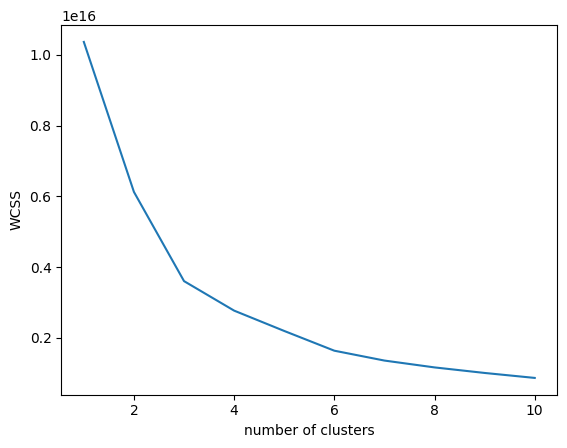

In [78]:
plt.plot([1,2,3,4,5,6,7,8,9,10],temp)
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [67]:
#n_clusters = 3
kmeans = KMeans(n_clusters = 3, init = "k-means++")
y_kmeans = kmeans.fit_predict(updated_df)

In [76]:
cluster = [0]*3
for i in y_kmeans:
    cluster[i] += 1
print(cluster)    

[15757, 1, 32]


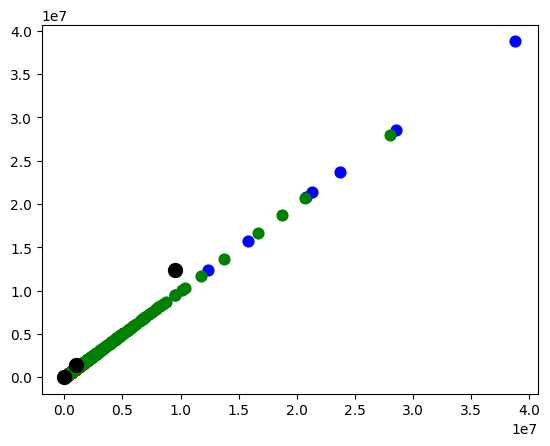

In [84]:
plt.scatter(updated_df[y_kmeans == 0], updated_df[y_kmeans == 0], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(updated_df[y_kmeans == 1], updated_df[y_kmeans == 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(updated_df[y_kmeans == 2], updated_df[y_kmeans == 2], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

In [86]:
pip install plotly

                                              0.0/15.5 MB ? eta -:--:--
                                             0.0/15.5 MB 991.0 kB/s eta 0:00:16
                                              0.1/15.5 MB 1.2 MB/s eta 0:00:14
                                             0.1/15.5 MB 751.6 kB/s eta 0:00:21
                                             0.1/15.5 MB 853.3 kB/s eta 0:00:19
                                             0.1/15.5 MB 853.3 kB/s eta 0:00:19
                                             0.2/15.5 MB 734.2 kB/s eta 0:00:21
                                             0.2/15.5 MB 795.7 kB/s eta 0:00:20
                                             0.3/15.5 MB 806.1 kB/s eta 0:00:19
                                             0.3/15.5 MB 866.5 kB/s eta 0:00:18
     -                                       0.4/15.5 MB 881.6 kB/s eta 0:00:18
     -                                       0.5/15.5 MB 880.6 kB/s eta 0:00:18
     -                                       0.5/


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\suman\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [92]:
import plotly.express as px
  
fig = px.scatter_3d(updated_df,9,42,56)
fig.show()

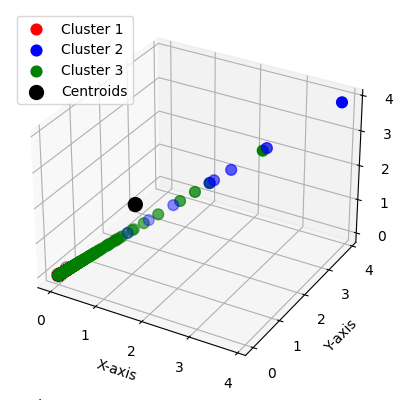

In [100]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(updated_df[y_kmeans == 0], updated_df[y_kmeans == 0], updated_df[y_kmeans == 0], s=60, c='red', label='Cluster 1')
ax.scatter(updated_df[y_kmeans == 1], updated_df[y_kmeans == 1], updated_df[y_kmeans == 1], s=60, c='blue', label='Cluster 2')
ax.scatter(updated_df[y_kmeans == 2], updated_df[y_kmeans == 2], updated_df[y_kmeans == 2], s=60, c='green', label='Cluster 3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='black', marker='o', label='Centroids')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.legend()

plt.show()

In [105]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\suman\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [107]:
from joblib import Parallel, delayed

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.cluster import KMeans

def calculate_trend(sales_data2):
    # Create a DataFrame with date and sales columns
    df2 = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=len(sales_data2), freq='W'), 'y': sales_data2})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df2)

    # Create a DataFrame for future predictions (next 8 weeks)
    future = model.make_future_dataframe(periods=8, freq='W')

    # Make predictions for the future
    forecast = model.predict(future)

    # Extract the trend from the forecast
    trend = forecast['yhat'].iloc[-8:].mean() - forecast['yhat'].iloc[-16:-8].mean()

    return trend

# Example data for 100 products with 8 weeks of sales each
# Replace this with your actual sales data DataFrame
sales_data2 = updated_df  # 100 products x 8 weeks DataFrame

# Perform KMeans clustering to group the products
sales_data2['cluster'] = y_kmeans

# Calculate the trend for each cluster
trends_per_cluster = {}
for cluster in range(num_clusters):
    cluster_sales_data = sales_data2[sales_data2['cluster'] == cluster].drop('cluster', axis=1)
    for _, row in cluster_sales_data.iterrows():
        product_sales_data = row.dropna().values.tolist()
        cluster_trend = calculate_trend(product_sales_data)
#         trends_per_cluster.setdefault(cluster, []).append(cluster_trend)
        trends_per_cluster[cluster] = Parallel(n_jobs=-1)(
        delayed(calculate_trend)(row.dropna().values.tolist()) for _, row in cluster_sales_data.iterrows())

# Print the trends for each cluster
for cluster, trends in trends_per_cluster.items():
    print(f"Trends for Cluster {cluster}: {trends}")

18:49:52 - cmdstanpy - INFO - Chain [1] start processing
18:49:52 - cmdstanpy - INFO - Chain [1] done processing
20:41:47 - cmdstanpy - INFO - Chain [1] start processing
20:41:47 - cmdstanpy - INFO - Chain [1] done processing
21:25:14 - cmdstanpy - INFO - Chain [1] start processing
21:25:14 - cmdstanpy - INFO - Chain [1] done processing
21:38:55 - cmdstanpy - INFO - Chain [1] start processing
21:38:55 - cmdstanpy - INFO - Chain [1] done processing
23:26:23 - cmdstanpy - INFO - Chain [1] start processing
23:26:23 - cmdstanpy - INFO - Chain [1] done processing
23:40:20 - cmdstanpy - INFO - Chain [1] start processing
23:40:20 - cmdstanpy - INFO - Chain [1] done processing
23:55:12 - cmdstanpy - INFO - Chain [1] start processing
23:55:12 - cmdstanpy - INFO - Chain [1] done processing
00:10:11 - cmdstanpy - INFO - Chain [1] start processing
00:10:11 - cmdstanpy - INFO - Chain [1] done processing
00:25:16 - cmdstanpy - INFO - Chain [1] start processing
00:25:16 - cmdstanpy - INFO - Chain [1]

In [104]:
trends_per_cluster

{0: [-29577.391745762237,
  -10909.358675565663,
  -4561.795544592428,
  1776368.9266571759,
  19765.301618202015,
  66560.02942331387,
  9301.925536278775,
  39664.57022614588,
  68850.07207899926,
  39110.78632498764,
  3300.511427788946,
  15394.10244765984,
  1221.2942228999382,
  46569.52926366853,
  10251.918239536466,
  16491.168790207055,
  80778.00559948993,
  110020.24950205897,
  14697.944916078486,
  -804.8609076326329,
  39272.59018371627,
  44413.86135177228,
  92723.71504446754,
  53576.5390612176,
  6387.862459822236,
  187068.2559487674,
  66538.21019736366,
  -131123.73009236433,
  33529.7053538106,
  -9729.483929065442,
  21475.647929048944,
  143592.3614029623,
  1233.6422965516404,
  7684.797810094914,
  56675.966457505405,
  224869.03386497888,
  104100.5956558194,
  17319.628566274518,
  40876.015280192456,
  -13533.810722581371,
  32969.79286038449,
  18369.138962315108,
  21587.98344137461,
  3406.7831297717394,
  2980.5158195604527,
  20480.629391852446,
  492